## 1. Exploratory Data Analysis (EDA)

### Importations

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from sklearn.preprocessing import OneHotEncoder

### Loading dataframes based on database's tables

In [46]:
conn = sqlite3.connect("db_insurance.db")

In [47]:
# Fetching data from database and creation of dataframes for each table
df_patient = pd.read_sql("SELECT * FROM patient", conn)
df_smoker = pd.read_sql("SELECT * FROM smoker", conn)
df_sex = pd.read_sql("SELECT * FROM sex", conn)
df_region = pd.read_sql("SELECT * FROM region", conn)

In [48]:
# Merging all dataframes
df_insurance = df_patient.copy()
df_insurance = df_insurance.merge(df_smoker, on="id_smoker", how="left")
df_insurance = df_insurance.merge(df_sex, on="id_sex", how="left")
df_insurance = df_insurance.merge(df_region, on="id_region", how="left")

In [49]:
# Removing id columns and personal information columns
df_insurance = df_insurance[["age", "bmi", "children", "charges", "is_smoker", "sex_label", "region_name"]]

In [50]:
# Renaming smoker, sex and region columns
df_insurance.rename(columns={"is_smoker": "smoker", "sex_label": "sex", "region_name": "region"}, inplace=True)

### First Visualizations

In [51]:
print("First lines of dataset:")
display(df_insurance.head(10))
print("\nLast lines of dataset:")
display(df_insurance.tail(10))
print("\nDataset shape:")
display(df_insurance.shape)
print("\nDataset information:")
display(df_insurance.info())
print("\nDataset description:")
display(df_insurance.describe(include='all'))
print("\nPresence of NaN in each variable:")
display(df_insurance.isna().any())

First lines of dataset:


,age,bmi,children,charges,smoker,sex,region
0,19,27.900,0,16884.92400,yes,female,southwest
1,18,33.770,1,1725.55230,no,male,southeast
2,28,33.000,3,4449.46200,no,male,southeast
3,33,22.705,0,21984.47061,no,male,northwest
4,32,28.880,0,3866.85520,no,male,northwest
5,31,25.740,0,3756.62160,no,female,southeast
6,46,33.440,1,8240.58960,no,female,southeast
7,37,27.740,3,7281.50560,no,female,northwest
8,37,29.830,2,6406.41070,no,male,northeast
9,60,25.840,0,28923.13692,no,female,northwest



Last lines of dataset:


,age,bmi,children,charges,smoker,sex,region
1328,23,24.225,2,22395.74424,no,female,northeast
1329,52,38.600,2,10325.20600,no,male,southwest
1330,57,25.740,2,12629.16560,no,female,southeast
1331,23,33.400,0,10795.93733,no,female,southwest
1332,52,44.700,3,11411.68500,no,female,southwest
1333,50,30.970,3,10600.54830,no,male,northwest
1334,18,31.920,0,2205.98080,no,female,northeast
1335,18,36.850,0,1629.83350,no,female,southeast
1336,21,25.800,0,2007.94500,no,female,southwest
1337,61,29.070,0,29141.36030,yes,female,northwest



Dataset shape:


(1338, 7)


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   sex       1338 non-null   object 
 6   region    1338 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None


Dataset description:


,age,bmi,children,charges,smoker,sex,region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338,1338,1338
unique,NaN,NaN,NaN,NaN,2,2,4
top,NaN,NaN,NaN,NaN,no,male,southeast
freq,NaN,NaN,NaN,NaN,1064,676,364
mean,39.207025,30.663397,1.094918,13270.422265,NaN,NaN,NaN
std,14.049960,6.098187,1.205493,12110.011237,NaN,NaN,NaN
min,18.000000,15.960000,0.000000,1121.873900,NaN,NaN,NaN
25%,27.000000,26.296250,0.000000,4740.287150,NaN,NaN,NaN
50%,39.000000,30.400000,1.000000,9382.033000,NaN,NaN,NaN
75%,51.000000,34.693750,2.000000,16639.912515,NaN,NaN,NaN



Presence of NaN in each variable:


age         False
bmi         False
children    False
charges     False
smoker      False
sex         False
region      False
dtype: bool

Dataset features:
- Lines: 1338, Columns: 7
- Types: float64 (2), int64 (2), object (3)
- Memory usage: 73.3+ KB
- Target variable: expenses
- No NaN

### Features Correlations

In [52]:
def binary_encoder(df, column, choice_true, choice_false):
    '''
    Encodes a binary variable.

    Parameters:
        - df: input dataframe
        - column: the variable to encode
        - choice_true: the value to replace by 1
        - choice_false: the value to replace by 0
    '''
    df[column] = df[column].map({choice_false: 0, choice_true: 1})

In [53]:
def onehot_encoder(df, column):
    '''
    One-Hot encodes a variable, then replaces the origin variable in the dataframe by the encoded variables.

    Parameters:
        - df: input dataframe
        - column: the variable to encode
    '''
    encoder = OneHotEncoder()
    encoded_array = encoder.fit_transform(df[[column]]).toarray()
    df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column]))

    # Replacing the original variable by the encoded variables
    df.drop(columns=[column], inplace=True)
    df = pd.concat([df, df_encoded], axis=1)
    return df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   smoker            1338 non-null   int64  
 5   sex               1338 non-null   int64  
 6   region_northeast  1338 non-null   float64
 7   region_northwest  1338 non-null   float64
 8   region_southeast  1338 non-null   float64
 9   region_southwest  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


None

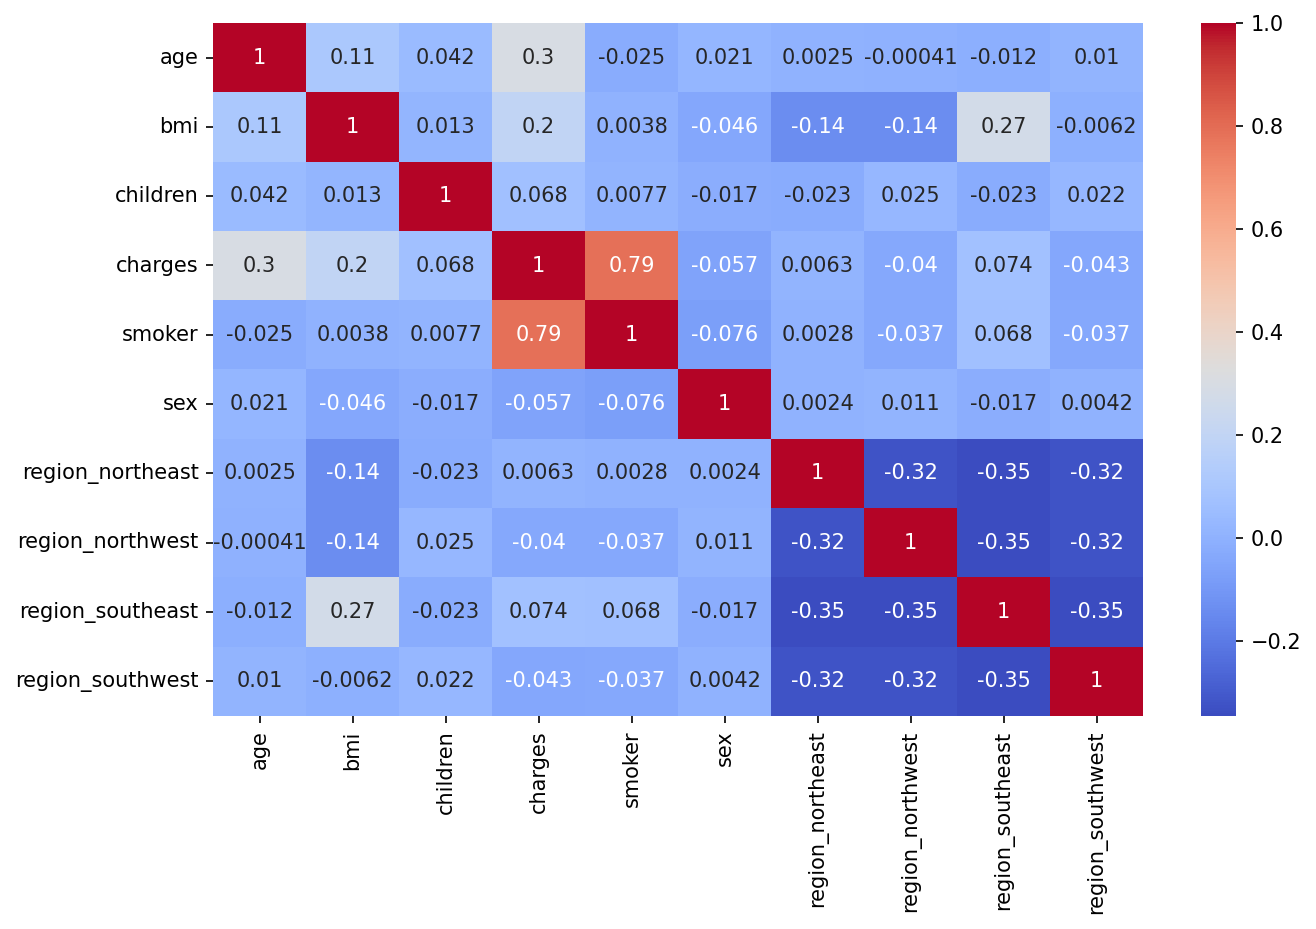

In [54]:
df_temp = df_insurance.copy()

# Encoding the binary variables in a temporary df
binary_encoder(df=df_temp, column='sex', choice_true='female', choice_false='male')
binary_encoder(df=df_temp, column='smoker', choice_true='yes', choice_false='no')

# Encoding the region variable in a temporary df
df_temp = onehot_encoder(df_temp, 'region')

# Displaying information on the temporary df
display(df_temp.info())

# Displaying a correlation heatmap of the temporary dataframe
df_corr = df_temp.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

Features with strong correlations :
- smoker / expenses : smoker is the most correlated to expenses
- age / expenses
- bmi / expenses
- region_northeast / bmi
- region_northwest / bmi
- region_southeast / bmi
    - The 4 region_ variables are the One-Hot encoded region variable. We can see that, in general, a person's BMI is correlated to their region.

### Features Distributions

In [57]:
def distrib_hisplot(df, rows_nb):
    '''
    Displays a set of histograms, based on a dataframe. It is possible to adjust the number of rows to
    display (with 3 graphs per row).

    Parameters:
        - df: the dataframe to visualize
        - rows_nb: the number of rows to display (depending on the number of variables in the df)
    '''
    fig, axs = plt.subplots(nrows=rows_nb, ncols=3, figsize=(15, 10))

    for i, column in enumerate(df.columns):
        row = i // 3
        col = i % 3
        sns.histplot(df[column], kde=True, ax=axs[row, col])
        axs[row, col].set_title(f"Values distribution of {column}")

    plt.tight_layout()
    plt.show()

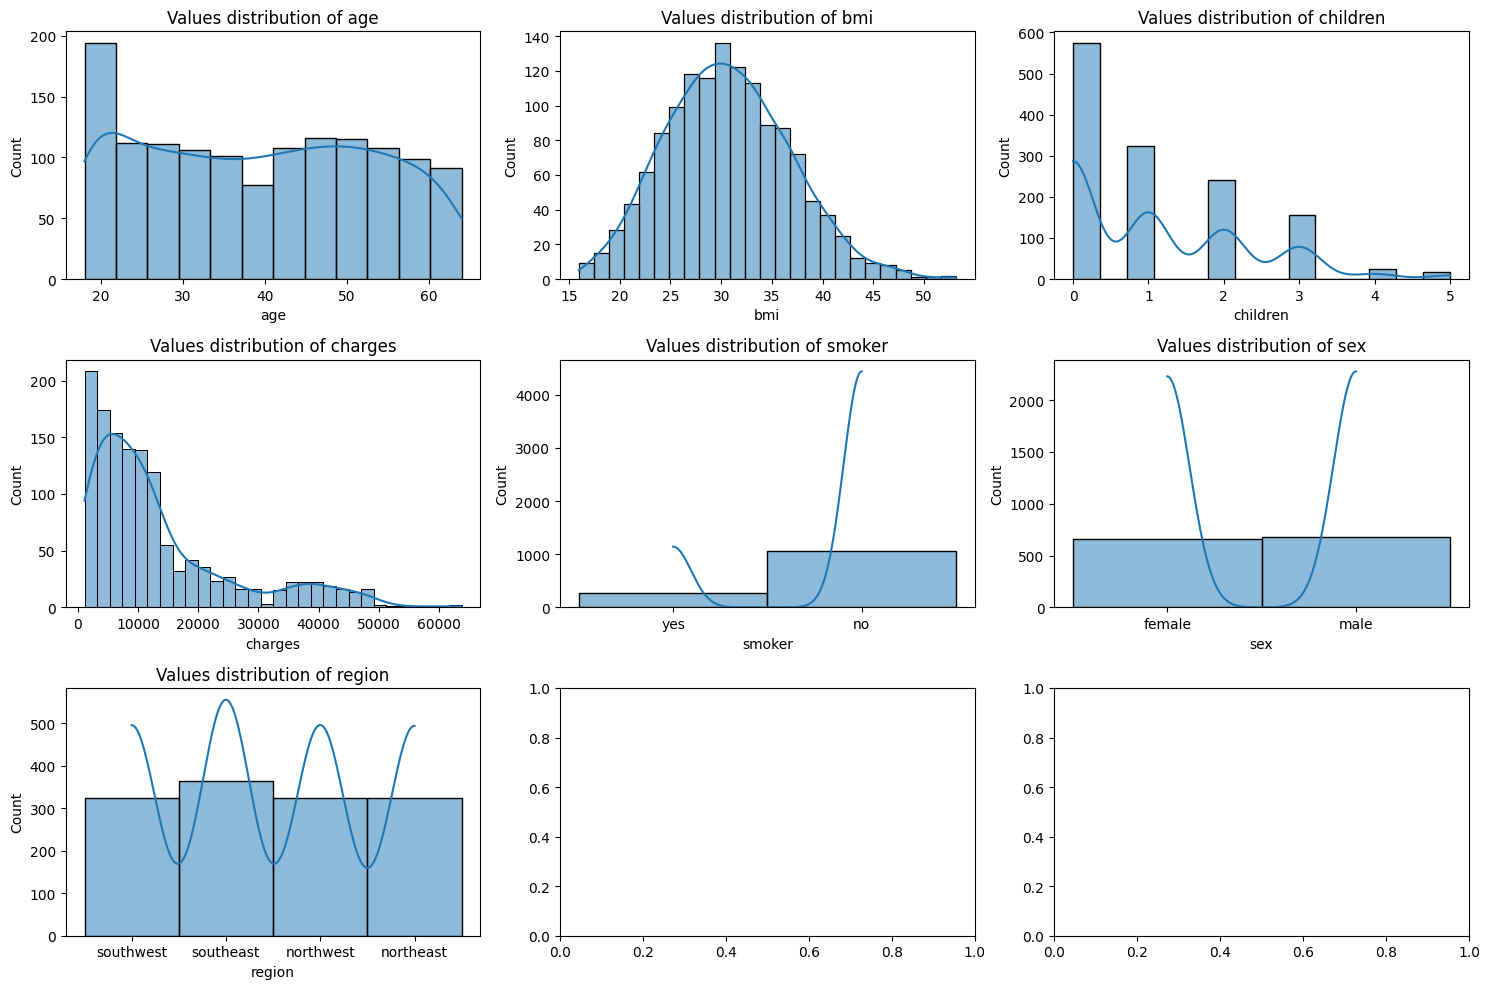

In [58]:
# Displaying the values distribution histograms
distrib_hisplot(df_insurance, 3)

Notes :
- Age distribution is quite balanced, despite the peak at 20.
- Sex distribution is almost perfectly balanced.
- BMI ditribution isn't well balanced, but is quite symetrical.
- Children distribution isn't balanced and is skewed.
- Smoker distribution isn't balanced.
- Region distribution is well balanced.
- Charges distribution isn't balanced and is skewed.

### Outliers Identification

In [59]:
def distrib_violinplot(df, rows_nb):
    '''
    Displays a set of violin graphs, based on a dataframe. It is possible to adjust the number of lines to
    display (with 3 graphs per line).

    Parameters:
        - df: the dataframe to visualize
        - rows_nb: the number of lines to display (depending on the number of variables in the df)
    '''
    fig, axs = plt.subplots(nrows=rows_nb, ncols=3, figsize=(15, 10))

    for i, column in enumerate(df.columns):
        row = i // 3
        col = i % 3
        sns.violinplot(df[column], ax=axs[row, col], orient='h')
        axs[row, col].set_title(f"Values distribution of {column}")

    plt.tight_layout()
    plt.show()

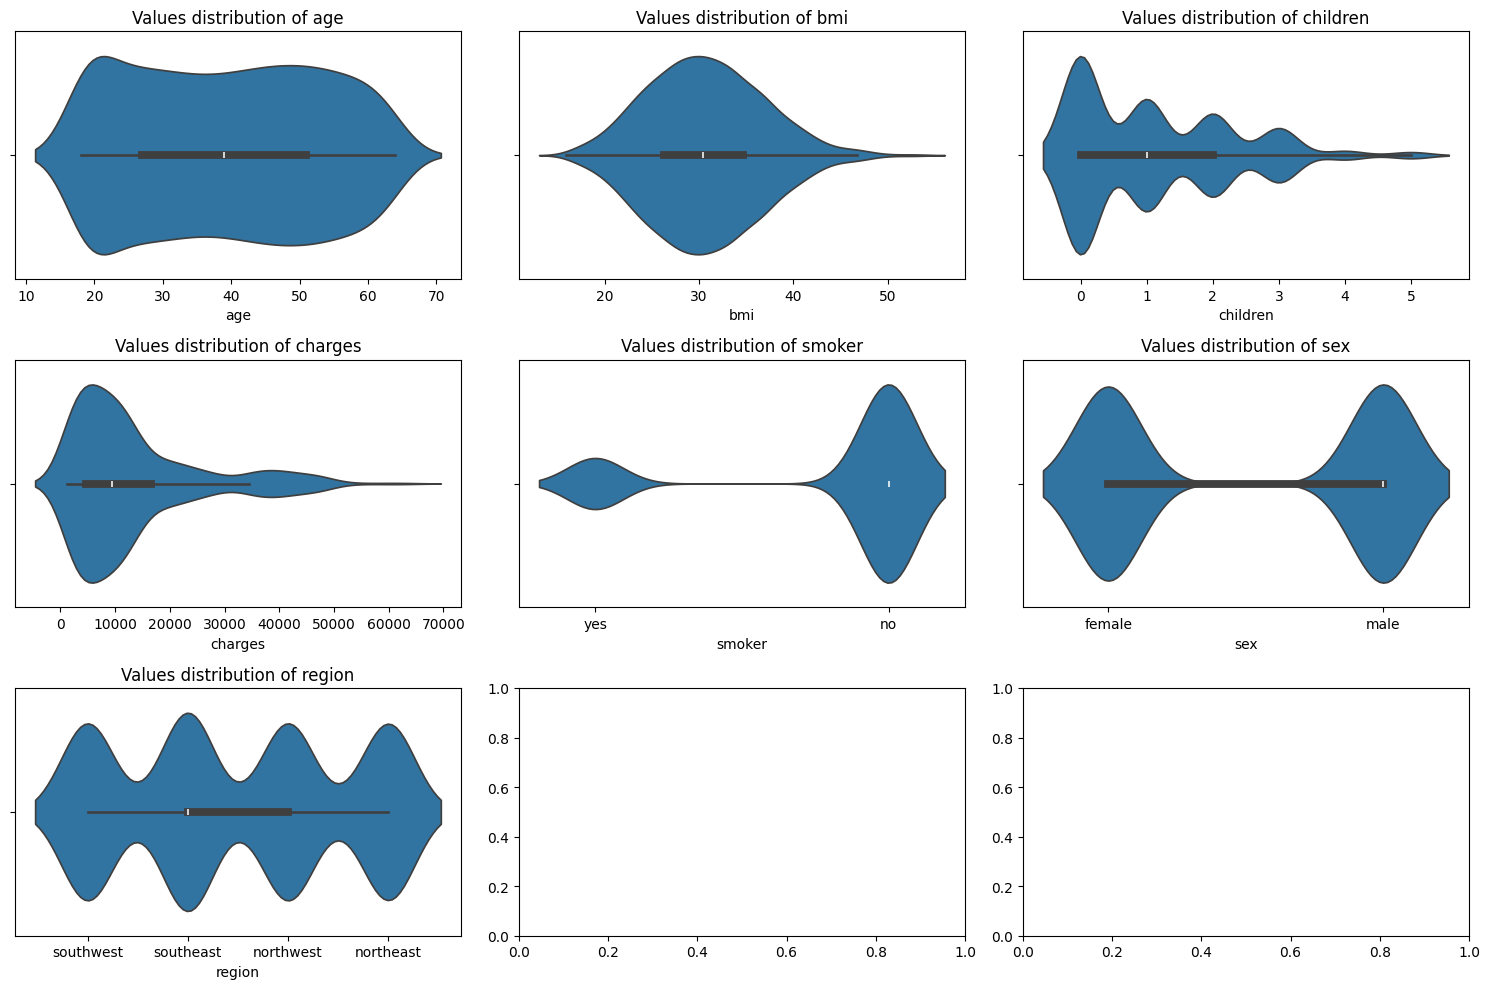

In [60]:
# Displaying violin plots
distrib_violinplot(df_insurance, 3)

Notes :
- A few outliers detected on bmi and charges.
- Sex, smoker and region shouldn't be taken into account, as they are class variables.